In [256]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [257]:
# create a session to run the tensors
sess = tf.Session()

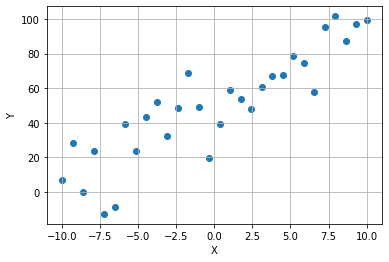

In [258]:
# Defining Values
values = np.linspace(-10, 10, 30)
errors = (np.random.random(values.shape) * 2 - 1) * 30
result = 5 * values + 50 + errors

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(values, result)

plt.show()

In [295]:
# Defining Tensors
xt = tf.constant(values, tf.float32)
yt = tf.constant(result, tf.float32)
wt = tf.Variable(0.0, tf.float32)
bt = tf.Variable(0.0, tf.float32)

yt_pred = xt * wt + bt

In [296]:
# initialize the variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [297]:
# Preparing Plot
def pre_plot():
    figure, plots = plt.subplots(1, 2, figsize=(12,5))

    plots[0].grid(True)
    plots[0].set_xlabel('Epoch')
    plots[0].set_ylabel('Error')

    plots[1].grid(True)
    plots[1].set_xlabel('X')
    plots[1].set_ylabel('Y')
    plots[1].scatter(values, result)
    
    return plots

In [298]:
# Defining parameters
learningRate = 0.01
max_epochs = 200
max_delta_err = 0.1

In [299]:
# Defining Error Optimizer
errort = tf.keras.losses.MSE(yt, yt_pred)

optimizer = tf.train.GradientDescentOptimizer(learningRate)
traint = optimizer.minimize(errort)

Error: 19.574954227476816
Epochs: 172
Delta: 0.099243164


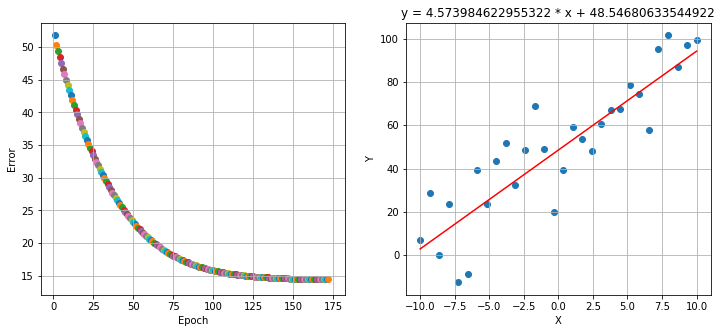

In [300]:
# Linear Regression
plots = pre_plot()

epochs = 0 
while True:
    epochs += 1
        
    sess.run(traint)
    
    w, b = sess.run((wt, bt))
    x, y = sess.run((xt, yt_pred))
    oerr, cerr = cerr, sess.run(errort)
    
    plots[0].scatter(epochs, cerr ** 0.5)
    
    if epochs >= max_epochs: break
    
    delta = abs(cerr - oerr)
    if delta <= max_delta_err: break
    
print('Error:', err ** 0.5)
print('Epochs:', epochs)
print('Delta:', delta)

plots[1].set_title(f'y = {w} * x + {b}')
plots[1].plot(x, y, color='red')

plt.show()

In [301]:
# closing session
sess.close()